In [1]:
import random
rand_x = [[random.randint(0,1000)/1000.0,random.randint(0,1000)/1000.0] for i in range(100)]
rand_y = [[rand_x[i][0]*2-rand_x[i][1]+rand_x[i-1][1]-rand_x[i-1][0]] for i in range(100)]

In [2]:
zip(rand_x, rand_y)

[([0.122, 0.205], [0.303]),
 ([0.033, 0.394], [-0.24500000000000002]),
 ([0.394, 0.073], [1.076]),
 ([0.77, 0.759], [0.45999999999999996]),
 ([0.941, 0.519], [1.3519999999999999]),
 ([0.302, 0.764], [-0.582]),
 ([0.032, 0.749], [-0.22300000000000003]),
 ([0.129, 0.607], [0.368]),
 ([0.159, 0.456], [0.33999999999999997]),
 ([0.435, 0.436], [0.731]),
 ([0.76, 0.722], [0.7989999999999999]),
 ([0.667, 0.596], [0.7]),
 ([0.403, 0.045], [0.69]),
 ([0.926, 0.135], [1.359]),
 ([0.777, 0.164], [0.5990000000000001]),
 ([0.582, 0.956], [-0.405]),
 ([0.82, 0.828], [1.186]),
 ([0.115, 0.21], [0.028000000000000025]),
 ([0.455, 0.905], [0.09999999999999999]),
 ([0.536, 0.898], [0.6240000000000001]),
 ([0.271, 0.703], [0.20100000000000007]),
 ([0.519, 0.586], [0.884]),
 ([0.653, 0.991], [0.382]),
 ([0.297, 0.773], [0.15899999999999992]),
 ([0.905, 0.016], [2.27]),
 ([0.952, 0.199], [0.8159999999999998]),
 ([0.874, 0.165], [0.8300000000000001]),
 ([0.071, 0.332], [-0.899]),
 ([0.261, 0.412], [0.3710000

[0.0]


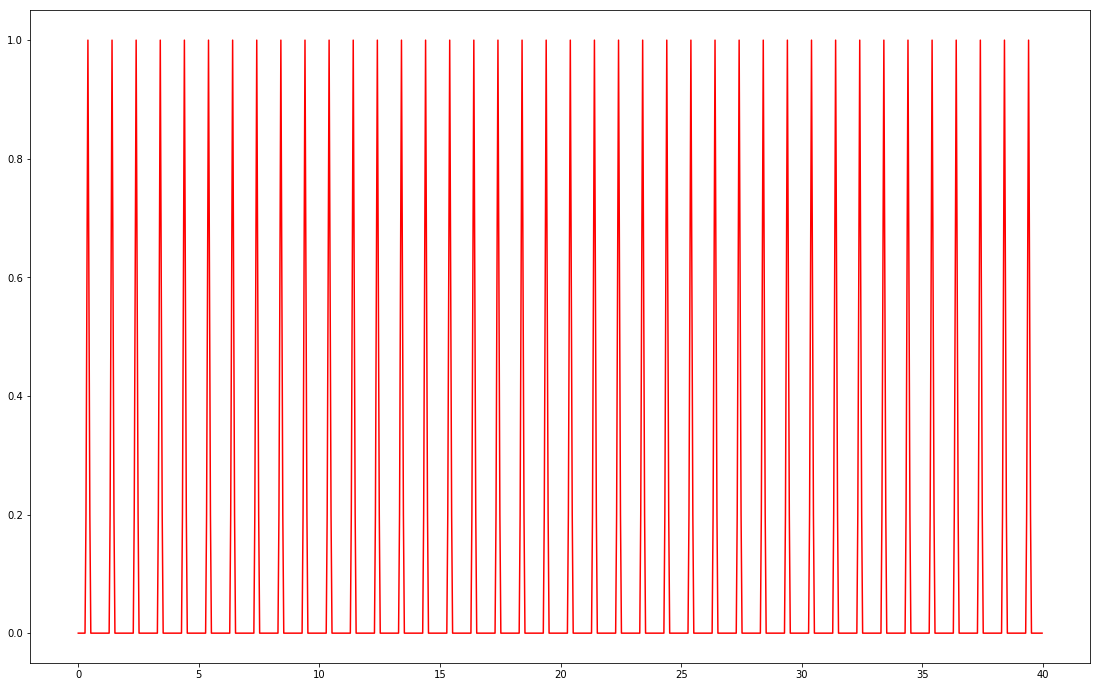

In [90]:
rand_x = [[i*1/25.0,random.randint(0,1000)/1000.0] for i in range(1000)]
rand_y = [[1-10*min(0.1, abs((i+15)/25.0-round((i+15)/25.0)))] for i in range(1000)]
#print rand_x
print rand_y[1]

import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d  

plt.figure(figsize=(19, 12))
#plt.plot([i for i in range(0,1000)], [i[0] for i in rand_x], 'b')
plt.plot([i[0] for i in rand_x], [i[0] for i in rand_y], 'r')
plt.show()

In [91]:
# Training Parameters
learning_rate = 0.001
training_steps = 10000
#batch_size = 128
display_step = 200

# Network Parameters
num_input = 2 # MNIST data input (img shape: 28*28)
timesteps = 30 # timesteps
num_hidden = 20 # hidden layer num of features
num_output= 1
#num_classes = 10 # MNIST total classes (0-9 digits)

In [92]:
train_x,train_y=[],[] 
for i in range(len(rand_x)-timesteps):
    x=rand_x[i:i+timesteps]
    y=rand_y[i+timesteps]
    train_x.append(x)
    train_y.append(y)

In [93]:
print(len(train_x))
print(len(train_y))

970
970


In [94]:
import tensorflow as tf
from tensorflow.contrib import rnn

graph = tf.Graph()
with graph.as_default(), tf.device('/cpu:0'):
    # tf Graph input
    X = tf.placeholder("float", [None, timesteps, num_input])
    Y = tf.placeholder("float", [None, num_output])
    
    # Define weights
    weights = {
        'out': tf.Variable(tf.random_normal([num_hidden, num_output]))
    }
    biases = {
        #'out': tf.Variable(tf.random_normal([num_classes]))
        'out':tf.Variable(tf.zeros([1]))
    }
    
    def RNN(x, weights, biases):
        # Prepare data shape to match `rnn` function requirements
        # Current data input shape: (batch_size, timesteps, n_input)
        # Required shape: 'timesteps' tensors list of shape (batch_size, n_input)

        # Unstack to get a list of 'timesteps' tensors of shape (batch_size, n_input)
        x = tf.unstack(x, timesteps, 1)

        # Define a lstm cell with tensorflow
        lstm_cell = rnn.BasicLSTMCell(num_hidden, forget_bias=1.0)

        # Get lstm cell output
        outputs, states = rnn.static_rnn(lstm_cell, x, dtype=tf.float32)

        # Linear activation, using rnn inner loop last output
        return tf.matmul(outputs[-1], weights['out']) + biases['out']
    
    logits = RNN(X, weights, biases)
    loss = tf.reduce_mean(tf.squared_difference(logits, Y))
    optimizer = tf.train.AdagradOptimizer(learning_rate = 0.1).minimize(loss)

In [95]:
with tf.Session(graph=graph) as session:
    tf.initialize_all_variables().run()
    print('Initialized')
    for step in range(training_steps):
        feed_dict = {X: train_x, Y: train_y}
        _, l, predictions = session.run([optimizer, loss, logits],feed_dict = feed_dict)
        if (step % 500 == 0):
            print('Loss at step %d: %f' % (step, l))
            
#     print("Testing Accuracy:",
#     session.run(accuracy, feed_dict={inputs: test_x, labels: test_y}))

Initialized
Loss at step 0: 32.188019
Loss at step 500: 0.061235
Loss at step 1000: 0.061108
Loss at step 1500: 0.061023
Loss at step 2000: 0.060951
Loss at step 2500: 0.060877
Loss at step 3000: 0.060801
Loss at step 3500: 0.060720
Loss at step 4000: 0.060630
Loss at step 4500: 0.060527
Loss at step 5000: 0.060410
Loss at step 5500: 0.060278
Loss at step 6000: 0.060146
Loss at step 6500: 0.060037
Loss at step 7000: 0.059942
Loss at step 7500: 0.059852
Loss at step 8000: 0.059773
Loss at step 8500: 0.059692
Loss at step 9000: 0.059595
Loss at step 9500: 0.059461


In [96]:
#0.006 0.0006?
res_x = [i[-1][0] for i in train_x]
print len(res_x)

print len(train_y)
print len(predictions)
#res_y = [i[0][0] for i in train_x]

970
970
970


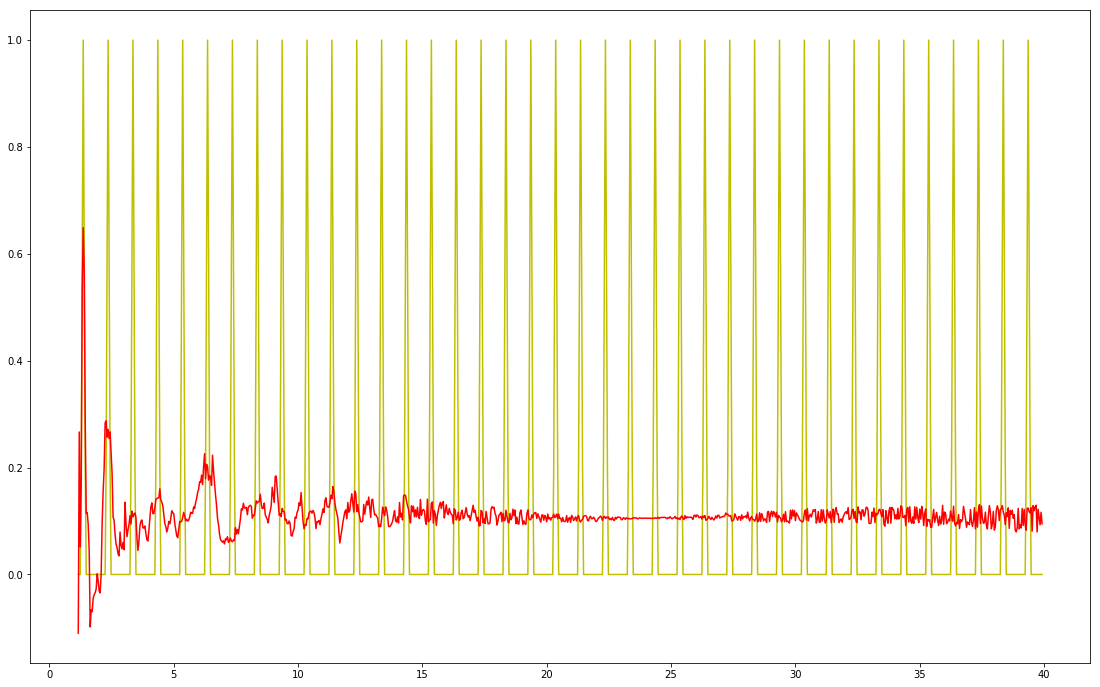

In [97]:
#0.506154  0.437124
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d  

# plt.plot([i[0][0] for i in train_x], [i[0] for i in train_y], 'ro')
# plt.plot([i[0][0] for i in train_x], [i[0] for i in predictions], 'bo')
# plt.show()

plt.figure(figsize=(19, 12))
#plt.plot([i for i in range(0,1000)], [i[0] for i in rand_x], 'b')
plt.plot([i for i in res_x], [i for i in train_y], 'y')
plt.plot([i for i in res_x], [i for i in predictions], 'r')
plt.show()

In [87]:
predictions

array([[ 0.90598375],
       [ 0.90571314],
       [ 0.90558362],
       [ 0.90165162],
       [ 0.90178865],
       [ 0.90489841],
       [ 0.90240288],
       [ 0.90097606],
       [ 0.90008581],
       [ 0.90612167],
       [ 0.90305877],
       [ 0.90276504],
       [ 0.90722334],
       [ 0.9077841 ],
       [ 0.90627599],
       [ 0.90849793],
       [ 0.90800369],
       [ 0.90793324],
       [ 0.91054583],
       [ 0.90778822],
       [ 0.90771562],
       [ 0.90845352],
       [ 0.90882885],
       [ 0.9123385 ],
       [ 0.9117704 ],
       [ 0.91315401],
       [ 0.91465741],
       [ 0.91291243],
       [ 0.91110045],
       [ 0.91162062],
       [ 0.91502619],
       [ 0.91290146],
       [ 0.91521347],
       [ 0.91397661],
       [ 0.91192162],
       [ 0.90910971],
       [ 0.90874034],
       [ 0.91129994],
       [ 0.90777802],
       [ 0.90801919],
       [ 0.91098857],
       [ 0.90919983],
       [ 0.90983355],
       [ 0.90922678],
       [ 0.90864086],
       [ 0